In [106]:
import numpy as np ,matplotlib.pyplot  as plt , seaborn as sns ,pandas as pd,plotly

### Read RegData csv file into numpy array 

In [107]:
data = np.genfromtxt('RegData.csv',delimiter=',')
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

### Read RegData csv file into numpy pands 

In [108]:
headers=['x','y']
data1 = pd.read_csv('RegData.csv', header=None, names=headers)
data1

x    y
0   2.9  4.0
1   6.7  7.4
2   4.9  5.0
3   7.9  7.2
4   9.8  7.9
5   6.9  6.1
6   6.1  6.0
7   6.2  5.8
8   6.0  5.2
9   5.1  4.2
10  4.7  4.0
11  4.4  4.4
12  5.8  5.2

### Define variables X and y. 
### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [109]:
x=data[:,0]
y=data[:,1]
print(x)
print(y)


[2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


### Plot the data (scatter plot of X,y)

<Axes: >

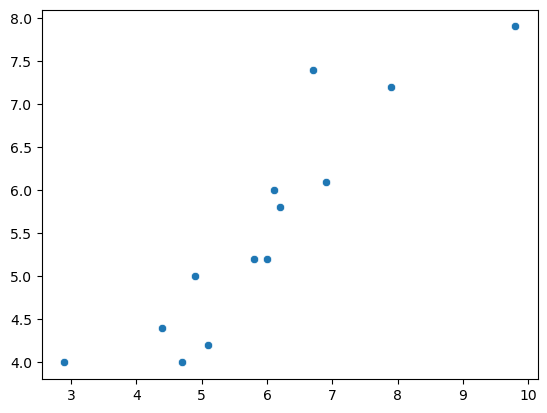

In [110]:
sns.scatterplot(x=x,y=y)

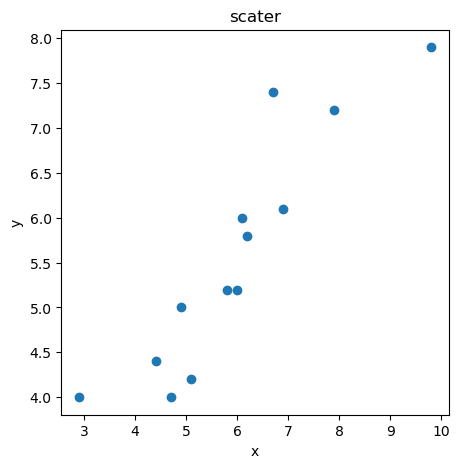

In [111]:
plt.figure(figsize=(5,5))
plt.scatter(x=x,y=y)
plt.title("scater")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Single Variable LR Implementation
### Follow the following steps:

### Step1: Initialize model parameters (theta_0 & theta_1):
- It is recommended to intitialize theta_0 = 0 and theta_1 = 0.
- Define the Learning rate value e.g. 0.01.
- Get the number of data points (m).

In [112]:
theta_0 = 0 
theta_1 = 0
alpha = 0.01  
m=len(data)  # or  
m= data.shape[0]

print(f'Number of data points (m): {m}')

Number of data points (m): 13


### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
- Do not loop through data points. Simply multiply X by theta_1 then add to theta_0.

In [113]:
h =theta_0 + theta_1 * x 
h

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> You better use either dot product or norm square of the error vector.

In [114]:
e = h - y
j =np.dot(e, e)/(2*m)  # Dot product approach

print(f'Error Vector:\n{e}\n')
print(f'j = {j}')

Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j = 16.305384479692314


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [115]:
d_theta_0 =  np.sum(e)/m    #(1 / (m)) * np.sum(y_pred - y)  *1
d_theta_1 = (e@x)/m         # (1 / (m)) * np.dot(y_pred - y,x)
print(d_theta_0)
print(d_theta_1)



-5.56923073976923
-35.04384604321538


### Step5: Update the parameters (simultaneously).

In [116]:
theta_0-=alpha*d_theta_0
theta_1-=alpha*d_theta_1
print(theta_0)
print(theta_1)

0.0556923073976923
0.3504384604321538


##### You made only one iteration. You need to iterate till to converge to the optimum solution (acheive the minimum of the cost function) or reach to the maximum number of iterations.

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations (e.g. 1000):
##### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations (1000 iterations) or reach the minimum.
##### Do not forget to put the initialization of theta_0, theta_1, and learnig rate in the same cell (use learning rate = 0.001). 
##### For this step, do not apply any stop conditions. Let the optimizer reaches the maximum number of iterations.

In [139]:
theta_0 = 0.0
theta_1 = 0.0
alpha = 0.001  
m=data.shape[0]


# Gradient descent loop
max_itrat=1000
for epcho in range(max_itrat) :
    print(f"****************** Iteration {epcho}********************")
    # Calculate predictions
    h =theta_0 + theta_1 * x 
    print(f"h(x)= \n{h}")
    e = h - y
    print(f"error vector=\n {e}\n\n")
     # Compute gradients
    j =  (e@e)/(2*m)  # Dot product approach
    print(f"j ={j} ")
    d_theta_0 = np.sum(e)/m
    d_theta_1 =(e@x)/m
    print(f"gradaint = \n[ {d_theta_0} \n {d_theta_1} ]\n")
     # Update parameters (simultaneously)
    theta_0-=alpha*(d_theta_0)
    theta_1-=alpha*(d_theta_1)
    print(f"new theta_0:{theta_0}")
    print(f"new theta_1:{theta_1}\n")
    
    






****************** Iteration 0********************
h(x)= 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
error vector=
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]


j =16.305384479692314 
gradaint = 
[ -5.56923073976923 
 -35.04384604321538 ]

new theta_0:0.00556923073976923
new theta_1:0.03504384604321538

****************** Iteration 1********************
h(x)= 
[0.10719639 0.24036299 0.17728408 0.28241562 0.34899893 0.24737177
 0.21933669 0.22284107 0.21583231 0.18429284 0.1702753  0.15976216
 0.20882354]
error vector=
 [-3.89280361 -7.1596371  -4.82271592 -6.91758419 -7.55100117 -5.85262813
 -5.78066331 -5.57715912 -4.9841675  -4.01570697 -3.8297247  -4.24023794
 -4.99117626]


j =15.070907994095792 
gradaint = 
[ -5.355015840795693 
 -33.673306701894624 ]

new theta_0:0.010924246580564925
new theta_1:0.06871715274511

****************** Iteration 2********************
h(x)=

### Implement the stop condition:
#### The optimizer reaches the optimium solution:
- This can be known if the norm of the gradient vector approximately equals to zero (practically we compare the gradient norm to a small value e.g <b>grad_norm < 0.1</b>).
- The check should be done before parameters update.

In [118]:
theta_0 = 0.0
theta_1 = 0.0
alpha = 0.001  
m=data.shape[0]

max_itrat=1000
# Gradient descent loopss
for epcho in range(max_itrat) :
    print(f"****************** Iteration {epcho}********************")
    # Calculate predictions
    h =theta_0 + theta_1 * x 
    print(f"h(x)= \n{h}")
    e = h - y
    print(f"error vector=\n {e}\n\n")
     # Compute gradients
    j =  (e@e)/(2*m)  # Dot product approach
    print(f"j ={j} ")
    d_theta_0 = np.sum(e)/m
    d_theta_1 =(e@x)/m
    print(f"gradaint = \n[ {d_theta_0} \n {d_theta_1} ]\n")
     # Update parameters (simultaneously)
    grad=np.array([d_theta_0,d_theta_1])
    grad_norm=np.linalg.norm(grad)
    if  grad_norm< 0.1:
        print(f'****************** Training Report ********************\n')
        print(f'Gradient Descent converged after {epcho+1} iterations\n')
        print(f'theta_0_Opt : {theta_0}')
        print(f'theta_1_Opt : {theta_1}\n')
        print(f'Error Vector:\n{e}\n')
        print(f'Cost = {j}\n')
        print(f'h(x) = y_predict:\n{h}\n')
        print(f'y_actual:\n{y}\n')
        break
        
    theta_0-=alpha*(d_theta_0)
    theta_1-=alpha*(d_theta_1)
    print(f"new theta_0:{theta_0}")
    print(f"new theta_1:{theta_1}\n")
    
    






****************** Iteration 0********************
h(x)= 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
error vector=
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]


j =16.305384479692314 
gradaint = 
[ -5.56923073976923 
 -35.04384604321538 ]

new theta_0:0.00556923073976923
new theta_1:0.03504384604321538

****************** Iteration 1********************
h(x)= 
[0.10719639 0.24036299 0.17728408 0.28241562 0.34899893 0.24737177
 0.21933669 0.22284107 0.21583231 0.18429284 0.1702753  0.15976216
 0.20882354]
error vector=
 [-3.89280361 -7.1596371  -4.82271592 -6.91758419 -7.55100117 -5.85262813
 -5.78066331 -5.57715912 -4.9841675  -4.01570697 -3.8297247  -4.24023794
 -4.99117626]


j =15.070907994095792 
gradaint = 
[ -5.355015840795693 
 -33.673306701894624 ]

new theta_0:0.010924246580564925
new theta_1:0.06871715274511

****************** Iteration 2********************
h(x)=

### Predict y values using the LR equation 
- Now we will use the obtained optimum parameters <b>theta_0 and theta_1</b> to make predition using the equation: 
<div style='text-align: center;'>
    <b>h(x)= theta_0 + theta_1 * x</b>
</div>


In [140]:
 y_pred1 =theta_0 + theta_1 * x 
print(f" h(x) = y_predict: \n{y_pred1}\n")

print(f" y_actual :\n{y}\n")

 h(x) = y_predict: 
[2.78824835 6.14440521 4.55464683 7.20424454 8.88232318 6.32104531
 5.61448575 5.70280559 5.52616591 4.73128651 4.37800673 4.11304721
 5.34952623]

 y_actual :
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]



# من اول هنا يعتبر مرحله  evluation 
# على  train data
### Plot the LR equation predicted output (fitted line) and the original data (scatter plot of X,y)

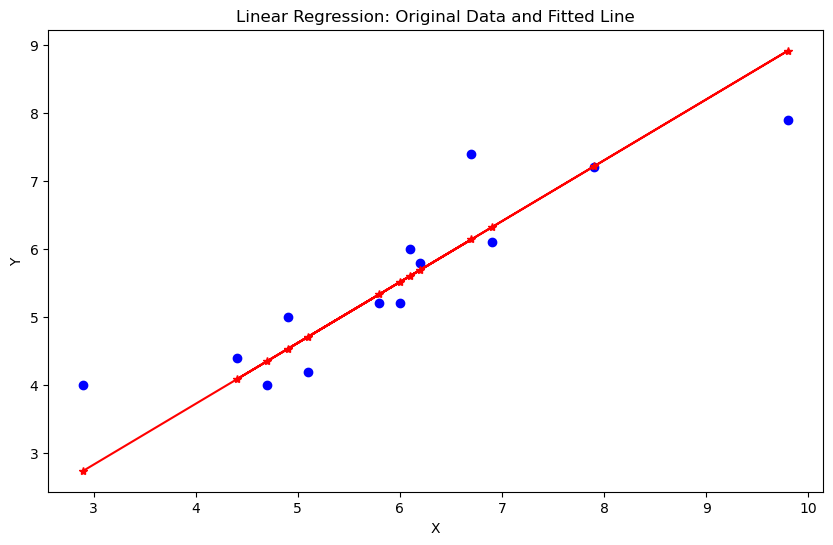

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(x=x,y=y,color='blue')


plt.plot(x,y_pred1,'r*-',label='Fitted Line (Prediction)')     # r for red ,* for symol ,  - for continouse line
# Add labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Linear Regression: Original Data and Fitted Line')
plt.show()                                                        # to delete  Text(0.5, 1.0, 'Linear Regression: Original Data and Fitted Line')

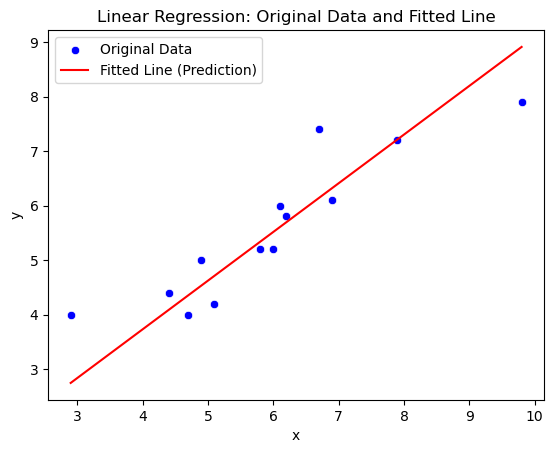

In [121]:

plt.figure()
sns.scatterplot(x=x,y=y ,color="blue",label="Original Data")

sns.lineplot(x=x,y=y_pred1,color="red",label='Fitted Line (Prediction)')
# Add labels and title
plt.xlabel('x')     # must write x in single quote
plt.ylabel('y') 
plt.legend()          # to show  -original data ,  fitted line 
plt.title('Linear Regression: Original Data and Fitted Line')

plt.show()

### Use R Squared metrics to evaluate LR equation output
- Can be found in <b>sklearn.metrics</b>

https://www.youtube.com/watch?v=KccCy0hu-dM

In [122]:
from sklearn.metrics import r2_score


In [123]:
r2_score(y,y_pred1)    # take  in order y and y_predict  out value [0-1] represent preformance/accurace of mode 

0.7483046604086072

### In order to obtain better score you can try to keep iterating to be closer to minimum:
- Update the stop condition <b>grad_norm<0.001</b>.
- Increase the learning rate <b>(0.01)</b> to perform larger update step.
- Increase number of maximum iterations <b>(e.g. 10000)</b>.

In [141]:
theta_0 = 0.0
theta_1 = 0.0
learning_rate = 0.01  
m=len(data)
epochs = 10000

# Gradient descent loop
for epcho in range(epochs) :
    print(f"****************** Iteration {epcho}********************")
    # Calculate predictions
    y_pred =theta_0 + theta_1 * x 
    print(f"h(x)= \n{y_pred}".format(y_pred))
    error = y_pred - y
    print(f"error vector=\n {error}\n")
     # Compute gradients
    mse_cost_dot = (1 / (2 * m)) * np.dot(error, error)  # Dot product approach
    print(f"j ={mse_cost_dot} ".format(mse_cost_dot))
    d_theta_0 = (1 / (m)) * np.sum(y_pred - y)  *1
    d_theta_1 = (1 / (m)) * np.dot(y_pred - y,x)
    
    print(f"gradaint = \n[ {d_theta_0} \n {d_theta_1} ]\n")
    # cond check 
    
    gradient_norm= np.sqrt(( d_theta_0*d_theta_0)+( d_theta_1*d_theta_1))
    # Create a gradient vector
    gradient_vector = np.array([d_theta_0, d_theta_1])
    # Calculate the L2 norm of the gradient vector
    gradient_norm = np.linalg.norm(gradient_vector)
    if gradient_norm<.001:
        print("****************** Training Report ********************\n")
        print(f"     Gradient Descent converged after {epcho+1} iterations\n")
        print(f" theta_0_Opt = {theta_0}")
        print(f" theta_1_Opt= {theta_1}\n")
        print(f" Error Vector:\n{error}\n")
        print(f" cost {mse_cost_dot}\n")
        break
        
     # Update parameters (simultaneously)
    theta_0-=learning_rate*(d_theta_0)
    theta_1-=learning_rate*(d_theta_1)




print(f" h(x) = y_predict: \n{y_pred}\n")

print(f" y_actual :\n{y}\n")
    
    






****************** Iteration 0********************
h(x)= 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
error vector=
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =16.305384479692314 
gradaint = 
[ -5.569230739769231 
 -35.04384604321538 ]

****************** Iteration 1********************
h(x)= 
[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]
error vector=
 [-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

j =6.175608808043303 
gradaint = 
[ -3.4270817500338526 
 -21.338452630007843 ]

****************** Iteration 2********************
h(x)= 
[1.72504984 3.86757703 2.85269581 4.54416477 5.6154285  3.98034179
 3.52928329 3.58566553 3.47290105 2.9654603  2.73993105 2.57

In [125]:
r2_score(y,y_pred)    # take  in order y and y_predict  out value [0-1] represent preformance/accurace of mode 

0.8213066507162167

### You can try different values of max. iterations, learning rate, and grad_norm to achieve the best r2_score value in minimum number of iterations (try at home).

In [142]:
 y_pred2=theta_0 + theta_1 * x 
print(f" h(x) = y_predict: \n{y_pred}\n")
print(f" y_actual :\n{y}\n")

 h(x) = y_predict: 
[3.44046859 6.08812727 4.83397327 6.92423028 8.24805979 6.22747794
 5.67007594 5.73975111 5.60040077 4.9733236  4.6946226  4.4855971
 5.46105044]

 y_actual :
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]



### Plot the new prediction and the original data

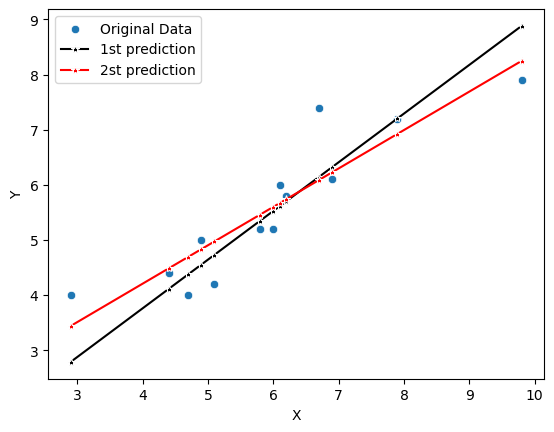

In [143]:
sns.scatterplot(x=x,y=y,label="Original Data")
sns.lineplot(x=x,y=y_pred1,color='k',label="1st prediction",marker='*')
sns.lineplot(x=x,y=y_pred2,color='red',label="2st prediction",marker='*')

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Plot loss function
### Repeat your implementaion version and save loss for each iteration (epoch)
### Use the following parameters:
- learning rate = 0.001.
- Maximum number of iterations = 1000.
- Stop condition grad_norm < 0.1.

In [ ]:
th_0 = 0.0
th_1 = 0.0
alpha = 0.001  
m=len(data)
max_iter = 1000 
loss=[]
# Gradient descent loop
for epcho in range(max_iter) :
    print(f"****************** Iteration {epcho}********************")
    # Calculate predictions
    h =th_0 + th_1 * x 
    print(f"h(x)= \n{h}")
    e = h - y
    print(f"error vector=\n {e}\n")
     # Compute gradients
    j = e@e/(2*m) # Dot product approach
    loss.append(j)
    print(f"j ={j} ".format(mse_cost_dot))
    d_th_0 =    np.sum(e)/m          #(1 / (m)) * np.sum(y_pred1 - y)  *1
    d_th_1 =   (e@x)/(m)             #(1 / (m)) * np.dot(y_pred1 - y,x)
    print(f"gradaint = \n[ {d_th_0} \n {d_th_1} ]\n")
    # cond check 
    grad=np.array([[d_th_0],[d_th_1]])
    #gradaint_norm= np.sqrt(( d_theta_0*d_theta_0)+( d_theta_1*d_theta_1))
    gradaint_norm = np.linalg.norm(grad)
    if gradaint_norm<.1:
        print("****************** Training Report ********************\n")
        print(f"     Gradient Descent converged after {epcho+1} iterations\n")
        print(f" theta_0_Opt = {th_0}")
        print(f" theta_1_Opt= {th_1}\n")
        print(f" Error Vector:\n{e}\n")
        print(f" cost {j}\n")
        print(f" h(x) = y_predict: \n{j}\n")
        print(f" y_actual :\n{y}\n")
        break
        
     # Update parameters (simultaneously)
    th_0-=alpha*(d_th_0)
    th_1-=alpha*(d_th_1)






### Plot loss vs. iterations

In [ ]:
plt.figure()
print(len(loss))
sns.scatterplot(loss)  # هنا هو هيحط قيمه للاندكس على محور x 
plt.show()

### Use the following parameters:
- learning rate = 0.01.
- Maximum number of iterations = 10000.
- Stop condition grad_norm < 0.001.

In [ ]:
th_0 = 0.0
th_1 = 0.0
alpha = 0.01  
m=len(data)
max_iter = 10000
loss=[]
# Gradient descent loop
for epcho in range(max_iter) :
    print(f"****************** Iteration {epcho}********************")
    # Calculate predictions
    h =th_0 + th_1 * x 
    print(f"h(x)= \n{h}")
    e = h - y
    print(f"error vector=\n {e}\n")
     # Compute gradients
    j = e@e/(2*m) # Dot product approach
    loss.append(j)
    print(f"j ={j} ".format(mse_cost_dot))
    d_th_0 =    np.sum(e)/m          #(1 / (m)) * np.sum(y_pred1 - y)  *1
    d_th_1 =   (e@x)/(m)             #(1 / (m)) * np.dot(y_pred1 - y,x)
    print(f"gradaint = \n[ {d_th_0} \n {d_th_1} ]\n")
    # cond check 
    grad=np.array([[d_th_0],[d_th_1]])
    #gradaint_norm= np.sqrt(( d_theta_0*d_theta_0)+( d_theta_1*d_theta_1))
    gradaint_norm = np.linalg.norm(grad)
    if gradaint_norm<.001:
        print("****************** Training Report ********************\n")
        print(f"     Gradient Descent converged after {epcho+1} iterations\n")
        print(f" theta_0_Opt = {th_0}")
        print(f" theta_1_Opt= {th_1}\n")
        print(f" Error Vector:\n{e}\n")
        print(f" cost {j}\n")
        print(f" h(x) = y_predict: \n{j}\n")
        print(f" y_actual :\n{y}\n")
        break
        
    # Update parameters (simultaneously)
    th_0-=alpha*(d_th_0)
    th_1-=alpha*(d_th_1)





    






In [ ]:

plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss,"*-")
plt.show()

### Use the following parameters:
- learning rate = 0.01.
- Maximum number of iterations = 1000.
- Stop condition grad_norm < 0.1.

In [ ]:
th_0 = 0.0
th_1 = 0.0
alpha = 0.01  
m=len(x)    # or shap[0]
max_iter = 1000
loss=[]
# Gradient descent loop
for epcho in range(max_iter) :
    print(f"****************** Iteration {epcho}********************")
    # Calculate predictions
    h =th_0 + th_1 * x 
    print(f"h(x)= \n{h}")
    e = h - y
    print(f"error vector=\n {e}\n")
     # Compute gradients
    j = (e@ e)/(2*m) # Dot product approach
    loss.append(j)
    print(f"j ={j} ")
    d_th_0 =  np.sum(e)/m
    d_th_1 =  (e@x)/m
    print(f"gradaint = \n[ {d_th_0} \n {d_th_1} ]\n")
    # cond check 
    grad=np.array([d_th_0,d_th_1])  # or      you can make two d array 
                                    #gradaint_norm= np.sqrt(( d_theta_0*d_theta_0)+( d_theta_1*d_theta_1))
    gradaint_norm = np.linalg.norm(grad)
    if gradaint_norm<.1:
        print("****************** Training Report ********************\n")
        print(f"     Gradient Descent converged after {epcho+1} iterations\n")
        print(f" theta_0_Opt = {th_0}")
        print(f" theta_1_Opt= {th_1}\n")
        print(f" Error Vector:\n{e}\n")
        print(f" cost {j}\n")
        break
     # Update parameters (simultaneously)
    th_0-=alpha*(d_th_0)
    th_1-=alpha*(d_th_1)

    print(f" h(x) = y_predict: \n{h}\n")
    print(f" y_actual :\n{y}\n")






<Axes: >

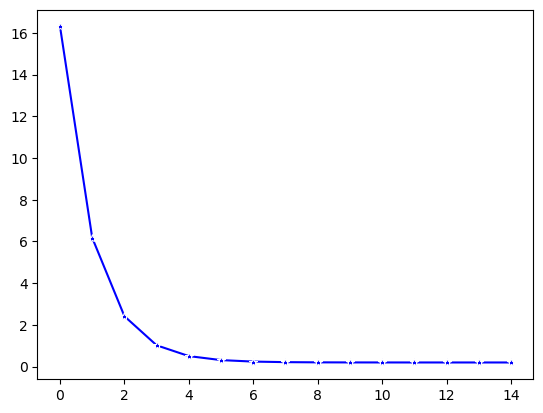

In [130]:
sns.lineplot(loss,linestyle='-',color='blue',marker='*',)
  


In [131]:
y_pred=x*theta_1+theta_0

In [132]:
r2_score(y,y_pred)

0.7480324921408193

### You can play with these parameters to see how the training behavior changes (do it at home).

## Plot all learning curves:
### In order to see the other learning curves you need to save theta_0 and theta_1 values at each iteration then plot theta_0 vs. loss and theta_1 vs. loss.
### Use the following parameters:
- learning rate = 0.01.
- Maximum number of iterations = 1000.
- Stop condition grad_norm < 0.1.

In [128]:
theta_0 = 0.0
theta_1 = 0.0
learning_rate = 0.01  
m=len(data)
epochs = 1000
loss_array=[]
theta_0_array=[]
theta_1_array=[]
# Gradient descent loop
for epcho in range(epochs) :
    print(f"****************** Iteration {epcho}********************")
    # Calculate predictions
    y_pred1 =theta_0 + theta_1 * x 
    print(f"h(x)= \n{y_pred1}".format(y_pred1))
    error = y_pred1 - y
    print(f"error vector=\n {error}\n")
     # Compute gradients
    mse_cost_dot = (1 / (2 * m)) * np.dot(error, error)  # Dot product approach
    theta_0_array.append(theta_0)
    theta_1_array.append(theta_1)
    loss_array.append(mse_cost_dot)
    print(f"j ={mse_cost_dot} ")
    d_theta_0 = (1 / (m)) * np.sum(y_pred1 - y)  *1
    d_theta_1 = (1 / (m)) * np.dot(y_pred1 - y,x)
    print(f"gradaint = \n[ {d_theta_0} \n {d_theta_1} ]\n")
    # cond check 
    grad=np.array([d_theta_0,d_theta_1])
    #gradaint_norm= np.sqrt(( d_theta_0*d_theta_0)+( d_theta_1*d_theta_1))
    gradaint_norm = np.linalg.norm(grad)
    if gradaint_norm<.1:        
        print("****************** Training Report ********************\n")
        print(f"     Gradient Descent converged after {epcho+1} iterations\n")
        print(f" theta_0_Opt = {theta_0}")
        print(f" theta_1_Opt= {theta_1}\n")
        print(f" Error Vector:\n{error}\n")
        print(f" cost {mse_cost_dot}\n")
        break
    
     # Update parameters (simultaneously)
    theta_0-=learning_rate*(d_theta_0)
    theta_1-=learning_rate*(d_theta_1)
   



print(f" h(x) = y_predict: \n{y_pred1}\n")

print(f" y_actual :\n{y}\n")
    
    






****************** Iteration 0********************
h(x)= 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
error vector=
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =16.305384479692314 
gradaint = 
[ -5.569230739769231 
 -35.04384604321538 ]

****************** Iteration 1********************
h(x)= 
[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]
error vector=
 [-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

j =6.175608808043303 
gradaint = 
[ -3.4270817500338526 
 -21.338452630007843 ]

****************** Iteration 2********************
h(x)= 
[1.72504984 3.86757703 2.85269581 4.54416477 5.6154285  3.98034179
 3.52928329 3.58566553 3.47290105 2.9654603  2.73993105 2.57

In [ ]:
plt.plot(theta_0_array ,loss_array,"mo-")
plt.grid()
plt.xlabel("theta_0")
plt.ylabel("Y")
plt.show()

# code by seaborn 
#sns.lineplot(x=theta_0_array, y=loss_array, marker="o", color="r")

In [ ]:
sns.lineplot(x=theta_1_array ,y=loss_array,marker="o",color="r",markersize=20)
plt.grid()
plt.xlabel("theta_1")
plt.ylabel("Y")
plt.show()

### Cost function stop condition
- In some cases you may face that the optimizer (here GD) stuck and the cost function value does not change.
- In this case it is a good decision to stop even if you did not achieve the required value of gradient norm.
- This can be done by adding another stop condition <b>(we call it convergence check)</b> by checking the cost in the current iteration is less than the cost in the previous iteration.
- Having said that, it is a good idea to compare the absolute difference to avoid optimizer stoping due to negative difference (this could happen if the optimizer oscilates and the current cost is larger than the previous one).

### Use the following parameters:
- learning rate = 0.01.
- Maximum number of iterations = 10000.
- Stop condition grad_norm < 0.001.
- Cost convergence check <b>abs(cost[i] - cost[i-1]) < 0.001 </b>

In [144]:
theta_0 = 0.0
theta_1 = 0.0
learning_rate = 0.01  
m=len(data)
epochs = 10000
loss_array=[]
theta_0_array=[]
theta_1_array=[]
# Gradient descent loop
for epcho in range(epochs) :
    print(f"****************** Iteration {epcho}********************")
    # Calculate predictions
    y_pred1 =theta_0 + theta_1 * x 
    print(f"h(x)= \n{y_pred1}".format(y_pred1))
    error = y_pred1 - y
    print(f"error vector=\n {error}\n")
     # Compute gradients
    mse_cost = (1 / (2 * m)) * np.dot(error, error)  # Dot product approach
    theta_0_array.append(theta_0)
    theta_1_array.append(theta_1)
    loss_array.append(mse_cost)
    print(f"j ={mse_cost_dot} ")
    d_theta_0 = (1 / (m)) * np.sum(y_pred1 - y)  *1
    d_theta_1 = (1 / (m)) * np.dot(y_pred1 - y,x)
    print(f"gradaint = \n[ {d_theta_0} \n {d_theta_1} ]\n")
    # cond check 
    grad=np.array([d_theta_0,d_theta_1])
    #gradaint_norm= np.sqrt(( d_theta_0*d_theta_0)+( d_theta_1*d_theta_1))
    gradaint_norm = np.linalg.norm(grad)

    if gradaint_norm<.001:
        print("****************** Training Report ********************\n")
        print(f"     Gradient Descent converged after {epcho+1} iterations\n")
        print(f" theta_0_Opt = {theta_0}")
        print(f" theta_1_Opt= {theta_1}\n")
        print(f" Error Vector:\n{error}\n")
        print(f" cost {mse_cost_dot}\n")
        break
    if epcho>0 and abs(loss_array[epcho-1]-loss_array[epcho])<.001 : 
        print("****************** Training Report ********************\n")
        print(f"     Gradient Descent converged after {epcho+1} iterations\n")
        print(f" theta_0_Opt = {theta_0}")
        print(f" theta_1_Opt= {theta_1}\n")
        print(f" Error Vector:\n{error}\n")
        print(f" cost {mse_cost_dot}\n")
        break
     # Update parameters (simultaneously)
    theta_0-=learning_rate*(d_theta_0)
    theta_1-=learning_rate*(d_theta_1)
   




print(f" h(x) = y_predict: \n{y_pred1}\n")
print(f" y_actual :\n{y}\n")
    
    






****************** Iteration 0********************
h(x)= 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
error vector=
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =0.1424577266640953 
gradaint = 
[ -5.569230739769231 
 -35.04384604321538 ]

****************** Iteration 1********************
h(x)= 
[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]
error vector=
 [-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

j =0.1424577266640953 
gradaint = 
[ -3.4270817500338526 
 -21.338452630007843 ]

****************** Iteration 2********************
h(x)= 
[1.72504984 3.86757703 2.85269581 4.54416477 5.6154285  3.98034179
 3.52928329 3.58566553 3.47290105 2.9654603  2.73993105 2.5

In [145]:
r2_score(y,y_pred)

0.8213066507162167

<Axes: >

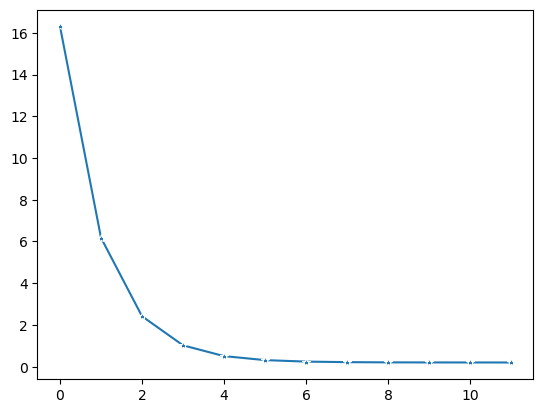

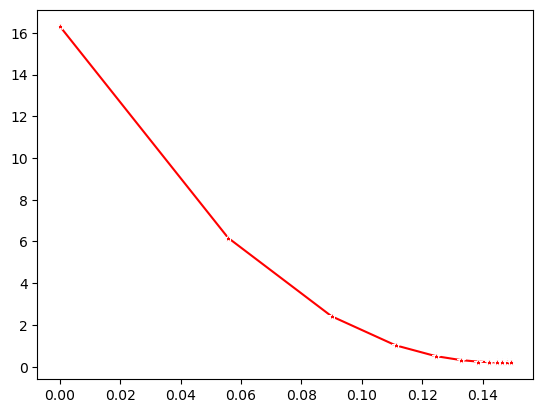

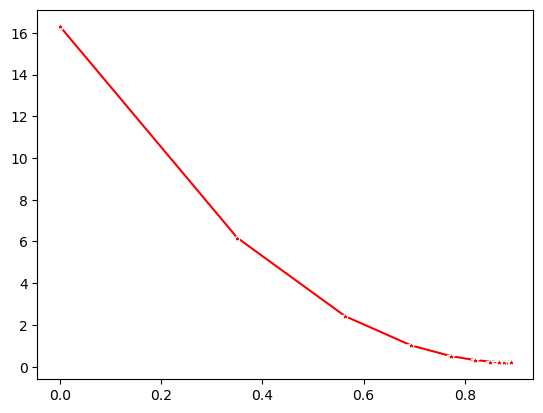

In [156]:
plt.figure()
sns.lineplot(loss_array,marker='*')
plt.figure()
sns.lineplot(y=loss_array,x=theta_0_array,marker='*',color='red')
plt.figure()
sns.lineplot(y=loss_array,x=theta_1_array,marker='*',color='red')


## Optional Part: Make all as funtions:
### You can modify the implementation to be a function taking all hyperparameters and return all needed outputs.
### You can also make your plotting using functions taking the outputs and return the learning curves.
### This will make your life easy when you want to try different values of hyperparametrs.

#### Use your previous code and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations, stop conditions values.
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses.

In [169]:
def  GD_func(x,y,alpha,max_iter,grad_check,loss_check):
    th_0 = 0.0
    th_1 = 0.0
    m=len(x)
    loss=[]
    th_0_array=[]
    th_1_array=[]
    # Gradient descent loop
    for epoch in range(max_iter) :
        print(f"****************** Iteration {epoch}********************")
        # Calculate predictions
        h =th_0 + th_1 * x 
        print(f"h(x)= \n{h}")
        e = h - y
        print(f"error vector=\n {e}\n")
        # Compute gradients
        j =e@e/(2*m) #(1 / (2 * m)) * np.dot(error, error)  # Dot product approach
        th_0_array.append(th_0)
        th_1_array.append(th_1)
        loss.append(j)
        print(f"j ={j} ")
        d_th_0 = e.sum()/m              #(1 / (m)) * np.sum(y_pred - y)*1
        d_th_1 = (e@x)/m               #(1 / (m)) * np.dot(y_pred - y,x)
        print(f"gradaint = \n[ {d_th_0} \n {d_th_1} ]\n")
        # cond check 
        grad=np.array([[d_th_0],[d_th_1]])
        gradaint_norm = np.linalg.norm(grad)
        if gradaint_norm<grad_check:
            print("****************** Training Report ********************\n")
            print(f" Gradient Descent converged after {epoch+1} iterations\n")
            print(f" theta_0_Opt = {th_0}")
            print(f" theta_1_Opt= {th_1}\n")
            print(f" Error Vector:\n{e}\n")
            print(f" cost {j}\n")
            break
        if epoch>0 and abs(loss[epoch-1]-loss[epoch])<loss_check:
            print("****************** Training Report ********************\n")
            print(f" Gradient Descent converged after {epoch+1} iterations\n")
            print(f" theta_0_Opt = {th_0}")
            print(f" theta_1_Opt= {th_1}\n")
            print(f" Error Vector:\n{e}\n")
            print(f" cost {j}\n")
            break
        # Update parameters (simultaneously)
        th_0-=alpha*(d_th_0)
        th_1-=alpha*(d_th_1)
   
    print(f" h(x) = y_predict: \n{h}\n")
    print(f" y_actual :\n{y}\n")
    return th_0_array,th_1_array,loss,y,h






#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.01, max. iterations = 500, and 0.001 for stop conditions.

In [173]:
th_0_array,th_1_array,loss,y,h=GD_func(x,y,.01,500,.001,.001)

****************** Iteration 0********************
h(x)= 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
error vector=
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =16.305384479692314 
gradaint = 
[ -5.56923073976923 
 -35.04384604321538 ]

****************** Iteration 1********************
h(x)= 
[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]
error vector=
 [-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

j =6.175608808043303 
gradaint = 
[ -3.427081750033852 
 -21.338452630007843 ]

****************** Iteration 2********************
h(x)= 
[1.72504984 3.86757703 2.85269581 4.54416477 5.6154285  3.98034179
 3.52928329 3.58566553 3.47290105 2.9654603  2.73993105 2.5707

In [171]:
r2_score(y,y_pred)

0.8213066507162167

<Axes: >

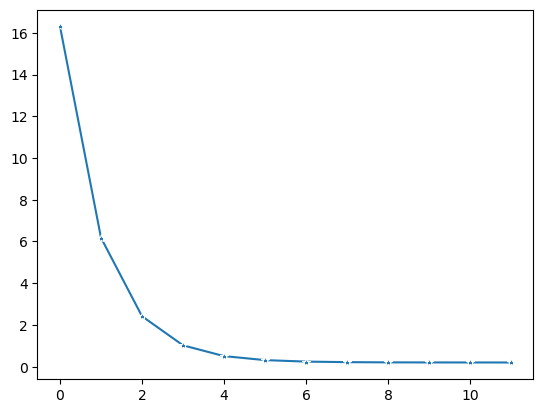

In [175]:
sns.lineplot(loss,marker='*')


In [178]:
def  plot_loss(Losses,titele):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.show()

def  plot_theat_loss(th,th_0_1,Losses,titele):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel(Th_0_1,fontsize=14,fontweight='bold')
    plt.ylabel('Loss',fontsize=14,fontweight='bold')
    plt.plot(Th,Losses,'-mo',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()
    

In [179]:
def calc_best_fit(th0,th1):
    y_best_fit=th_1*x+th_0
    return y_best_fit


    